## Cálculo do Retorno de uma Carteira de Ações


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

Definição dos ativos financeiros e seus pesos (%) nas carteiras Brasileira e Americana.

In [26]:
br_tickers_n_weights = (
    ("WEGE3.SA", 0.080),
    ("VALE3.SA", 0.080),
    ("PETR3.SA", 0.040),
    ("ARZZ3.SA", 0.030),
    ("LREN3.SA", 0.030),
    ("GRND3.SA", 0.030),
    ("ABEV3.SA", 0.050),
    ("MDIA3.SA", 0.040),
    ("SLCE3.SA", 0.040),
    ("PSSA3.SA", 0.040),
    ("B3SA3.SA", 0.035),
    ("ITUB3.SA", 0.080),
    ("BBAS3.SA", 0.050),
    ("RADL3.SA", 0.050),
    ("ODPV3.SA", 0.030),
    ("FLRY3.SA", 0.030),
    ("HYPE3.SA", 0.030),
    ("VIVT3.SA", 0.040),
    ("SAPR3.SA", 0.035),
    ("EGIE3.SA", 0.080),
    ("EQTL3.SA", 0.080),
)

usa_tickers_n_weights = (
    ("MMM", 0.03571428571),
    ("WST", 0.03571428571),
    ("PG", 0.03571428571),
    ("JPM", 0.03571428571),
    ("TXN", 0.03571428571),
    ("ROST", 0.03571428571),
    ("JNJ", 0.03571428571),
    ("PAYX", 0.03571428571),
    ("FAST", 0.03571428571),
    ("EXPD", 0.03571428571),
    ("NKE", 0.03571428571),
    ("DIS", 0.03571428571),
    ("TTC", 0.03571428571),
    ("AAPL", 0.03571428571),
    ("UNH", 0.03571428571),
    ("ADBE", 0.03571428571),
    ("GOOGL", 0.03571428571),
    ("COST", 0.03571428571),
    ("ANSS", 0.03571428571),
    ("HD", 0.03571428571),
    ("ACN", 0.03571428571),
    ("BLK", 0.03571428571),
    ("MSFT", 0.03571428571),
    ("VNQ", 0.03571428571),
    ("VOO", 0.03571428571),
    ("VIOV", 0.03571428571),
    ("VBR", 0.03571428571),
    ("VPL", 0.03571428571),
)

br_index_ticker = "^BVSP"

usa_index_ticker = "^GSPC"

Download dos dados dos ativos financeiros a partir do Yahoo Finance a partir de 02/02/2011.

In [27]:
br_stock_data = pd.DataFrame()
br_index_data = pd.DataFrame()
usa_stock_data = pd.DataFrame()
usa_index_data = pd.DataFrame()
# start_date: str = "2011-02-02"
start_date: str = "2022-01-01"
end_date: str = datetime.now().strftime("%Y-%m-%d")

for t in br_tickers_n_weights:
    ticker: str = t[0]
    br_stock_data[ticker]: dict = yf.download(
        ticker, progress=False, start=start_date, end=end_date
    )["Adj Close"]

for t in usa_tickers_n_weights:
    ticker: str = t[0]
    usa_stock_data[ticker]: dict = yf.download(
        ticker, progress=False, start=start_date, end=end_date
    )["Adj Close"]

br_index_data[br_index_ticker]: dict = yf.download(
    br_index_ticker, progress=False, start=start_date, end=end_date
)["Adj Close"]

usa_index_data[usa_index_ticker]: dict = yf.download(
    usa_index_ticker,
    progress=False,
    start=start_date,
    end=end_date,
)["Adj Close"]

---


### Gráficos

Gráfico Normalizado das Ações Brasileiras:

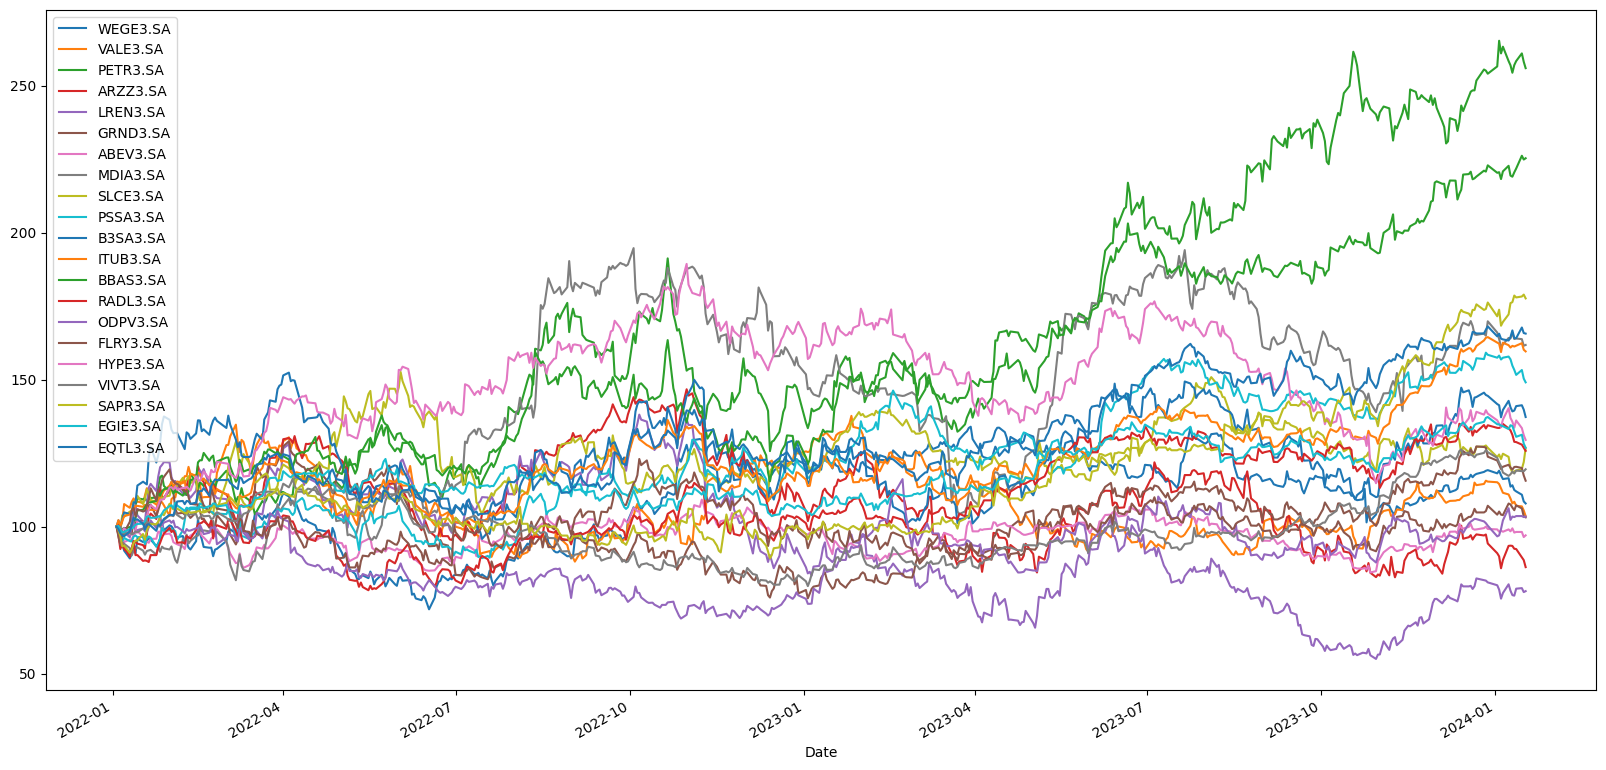

In [28]:
(br_stock_data / br_stock_data.iloc[0] * 100).plot(figsize=(20, 10))
plt.show()

Gráfico Normalizado do Índice Brasileiro:

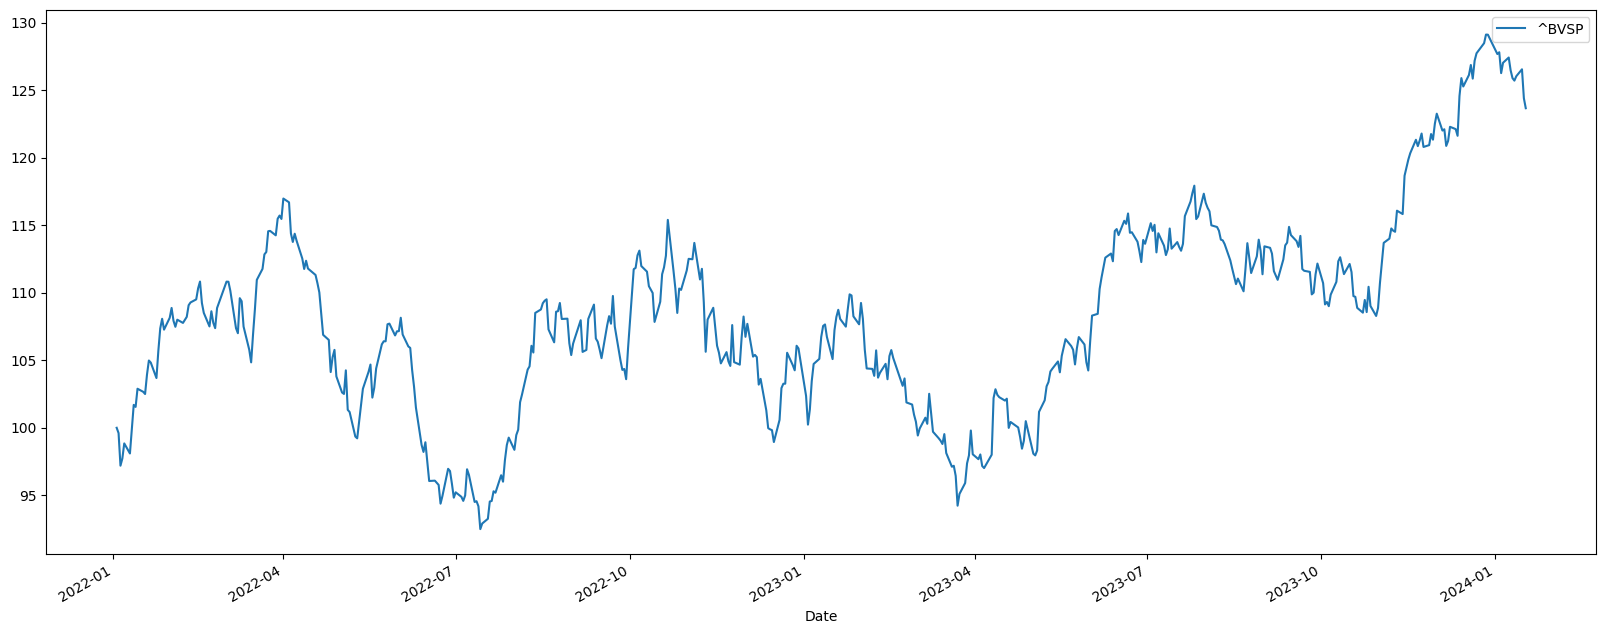

In [29]:
(br_index_data / br_index_data.iloc[0] * 100).plot(figsize=(20, 8))
plt.show()

Gráfico Normalizado das Ações Americanas:

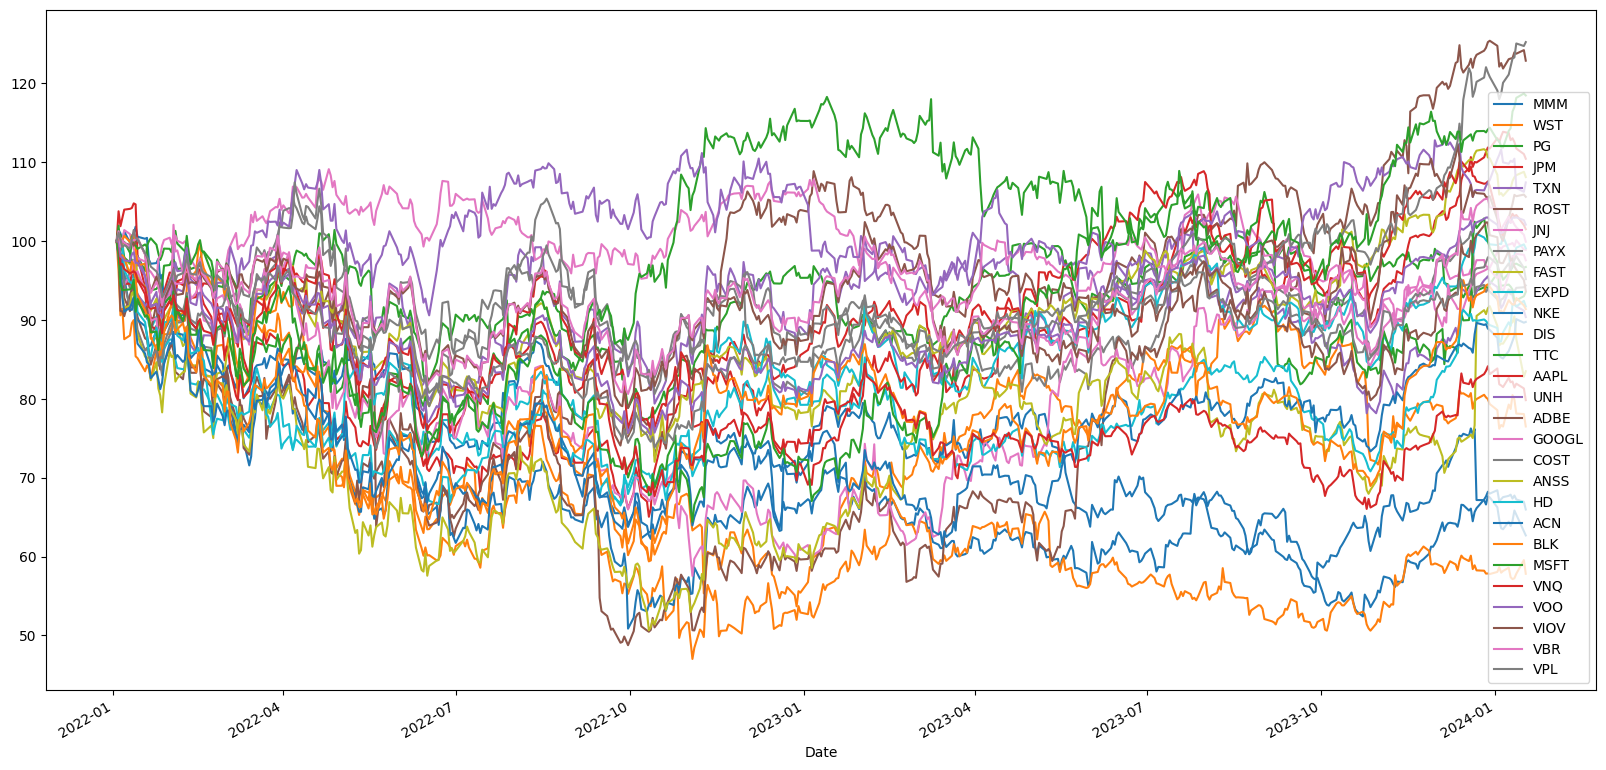

In [30]:
(usa_stock_data / usa_stock_data.iloc[0] * 100).plot(figsize=(20, 10))
plt.show()

Gráfico Normalizado do Índice Americano:

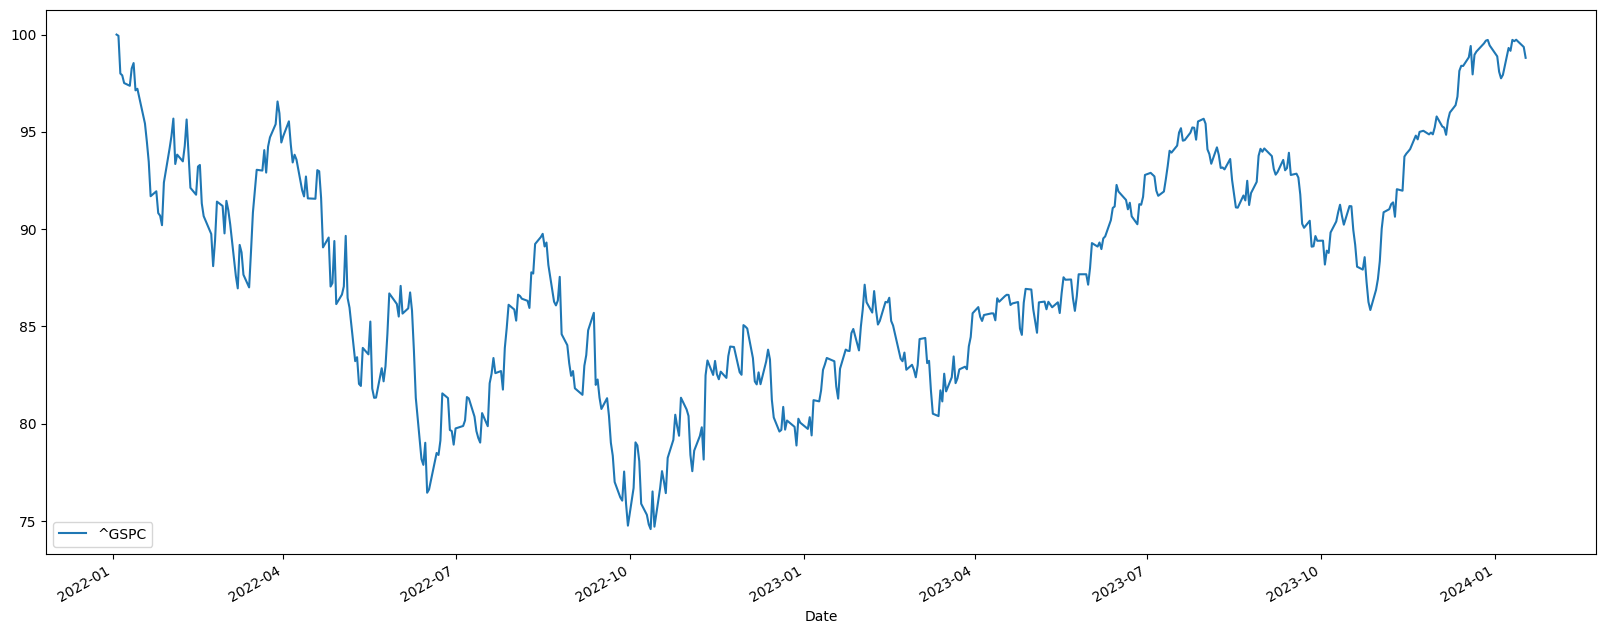

In [31]:
(usa_index_data / usa_index_data.iloc[0] * 100).plot(figsize=(20, 8))
plt.show()

---


### Calculando o Retorno Médio de uma Carteira de Ações


Calcular o retorno simples dos ativos financeiros da carteira e armazenar os resultados em uma nova tabela.


In [32]:
br_index_returns = (br_index_data / br_index_data.shift(1)) - 1
br_stock_returns = (br_stock_data / br_stock_data.shift(1)) - 1

usa_index_returns = (usa_index_data / usa_index_data.shift(1)) - 1
usa_stock_returns = (usa_stock_data / usa_stock_data.shift(1)) - 1

Armazenar os pesos dos ativos financeiros das carteiras para que se possa calcular o produto escalar dos retornos anuais com seus respectivos pesos.


In [33]:
br_weights = np.array([tw[1] for tw in br_tickers_n_weights])
usa_weights = np.array([tw[1] for tw in usa_tickers_n_weights])

Calcular e exibir a rentabilidade média anual de cada ativo financeiro da carteira Brasileira.

In [34]:
br_index_annual_returns = br_index_returns.mean() * 250
br_stock_annual_returns = br_stock_returns.mean() * 250
br_stock_annual_returns

WEGE3.SA    0.086721
VALE3.SA    0.071250
PETR3.SA    0.530750
ARZZ3.SA    0.007189
LREN3.SA   -0.016599
GRND3.SA    0.071448
ABEV3.SA    0.010894
MDIA3.SA    0.326173
SLCE3.SA    0.171283
PSSA3.SA    0.231272
B3SA3.SA    0.234307
ITUB3.SA    0.253551
BBAS3.SA    0.439939
RADL3.SA    0.149784
ODPV3.SA    0.075914
FLRY3.SA    0.128487
HYPE3.SA    0.170387
VIVT3.SA    0.109353
SAPR3.SA    0.317044
EGIE3.SA    0.133436
EQTL3.SA    0.277309
dtype: float64

Calcular e exibir a rentabilidade média anual de cada ativo financeiro da carteira Americana.

In [35]:
usa_index_annual_returns = usa_index_returns.mean() * 250
usa_stock_annual_returns = usa_stock_returns.mean() * 250
usa_stock_annual_returns

MMM     -0.167082
WST     -0.065994
PG       0.000954
JPM      0.080706
TXN     -0.010423
ROST     0.162795
JNJ      0.008661
PAYX     0.003595
FAST     0.069432
EXPD     0.032564
NKE     -0.166258
DIS     -0.216378
TTC      0.010234
AAPL     0.048815
UNH      0.060903
ADBE     0.102489
GOOGL    0.047326
COST     0.143529
ANSS    -0.019444
HD      -0.006725
ACN     -0.014133
BLK      0.000575
MSFT     0.128892
VNQ     -0.085076
VOO      0.028608
VIOV    -0.006138
VBR      0.023162
VPL     -0.009837
dtype: float64

Calcular o produto escalar dos retornos anuais e seus pesos, em seguida, exibir o resultado percentual.


In [36]:
for i in (
    (
        "Rentabilidade Média Anual do Portfólio BR:",
        br_stock_annual_returns,
        br_weights,
    ),
    ("Rentabilidade Média Anual do Índice BR:", br_index_annual_returns, [1]),
    (
        "\nRentabilidade Média Anual do Portfólio USA:",
        usa_stock_annual_returns,
        usa_weights,
    ),
    ("Rentabilidade Média Anual do Índice USA:", usa_index_annual_returns, [1]),
):
    produto_escalar = np.dot(i[1], i[2])
    result = "{0:.2f} %".format(round(produto_escalar, 5) * 100)
    print(i[0], result)

Rentabilidade Média Anual do Portfólio BR: 18.30 %
Rentabilidade Média Anual do Índice BR: 12.25 %

Rentabilidade Média Anual do Portfólio USA: 0.66 %
Rentabilidade Média Anual do Índice USA: 1.26 %


O retorno desta carteira é satisfatório?
